# PROSPER LOAN DATA EDA & Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline
plt.style.use('seaborn-darkgrid')

print("Setup Complete")

Setup Complete


In [2]:
#Importing the data base 
proposerloan_filepath = "../input/prosper-loan/prosperLoanData.csv"
loan = pd.read_csv(proposerloan_filepath)
np.random.seed(0) 
print("Setup Complete")

Setup Complete


In [3]:
loan.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [4]:
loan.describe()


,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [5]:
loan.corr()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
ListingNumber,1.000000,0.319971,-0.031520,-0.114391,-0.113544,-0.217721,-0.239568,-0.461391,0.209200,-0.106235,...,0.208286,0.104191,-0.251739,-0.247716,-0.096004,0.014688,-0.126031,-0.092813,-0.053481,-0.279659
Term,0.319971,1.000000,-0.011183,0.020085,0.020556,0.057047,-0.107140,0.152505,0.079179,0.028947,...,-0.167600,0.035841,-0.038353,-0.035981,-0.034157,-0.028806,-0.056680,-0.043507,-0.024472,-0.045137
BorrowerAPR,-0.031520,-0.011183,1.000000,0.989824,0.989329,0.895635,0.949538,0.794275,-0.962151,-0.668287,...,0.116974,-0.041452,0.067301,0.067385,0.028519,-0.028236,-0.044236,-0.046757,-0.031841,-0.307606
BorrowerRate,-0.114391,0.020085,0.989824,1.000000,0.999211,0.895282,0.945297,0.817670,-0.953105,-0.649736,...,0.095993,-0.053378,0.100635,0.100308,0.042059,-0.029025,-0.030579,-0.037312,-0.026512,-0.274217
LenderYield,-0.113544,0.020556,0.989329,0.999211,1.000000,0.895343,0.945308,0.817654,-0.953119,-0.649783,...,0.097854,-0.052954,0.099506,0.099195,0.041025,-0.029209,-0.031069,-0.037302,-0.026632,-0.274174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,0.014688,-0.028806,-0.028236,-0.029025,-0.029209,-0.043366,-0.022738,-0.039422,0.012491,-0.019344,...,0.069591,0.006186,-0.013144,-0.013578,0.000776,1.000000,0.009604,0.001622,0.003338,-0.049716
Recommendations,-0.126031,-0.056680,-0.044236,-0.030579,-0.031069,-0.046694,0.004081,-0.019886,0.004772,0.026658,...,-0.039016,-0.015910,0.041372,0.040897,0.016845,0.009604,1.000000,0.718079,0.322062,0.073824
InvestmentFromFriendsCount,-0.092813,-0.043507,-0.046757,-0.037312,-0.037302,-0.063848,0.009475,-0.043022,0.007746,0.028343,...,-0.035004,-0.008319,0.020932,0.020350,0.010109,0.001622,0.718079,1.000000,0.483506,0.058773
InvestmentFromFriendsAmount,-0.053481,-0.024472,-0.031841,-0.026512,-0.026632,-0.038146,0.024555,-0.031902,-0.010459,0.003131,...,-0.056675,-0.010141,0.028762,0.028301,0.018604,0.003338,0.322062,0.483506,1.000000,0.012178


In [6]:
# get the number of missing data points per column
missing_values_count = loan.isnull().sum()
print("Missing values per collumn : \n",missing_values_count)

# how many total missing values do we have?
total_cells = np.product(loan.shape)
total_missing = missing_values_count.sum()
print("\n Total missing values : " ,total_missing)

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print("\n Missing values percentage : ",percent_missing,"%")

#more information about data
print("\n ")
loan.info()

Missing values per collumn : 
 ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

 Total missing values :  1364086

 Missing values percentage :  14.780596207759173 %

 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3

 * It looks like there are some variables missing "**NAN**" and many other having the value **0**
 * "ListingNumber","Term","BorrowerRate","LenderYield", are **not missing** any values
 * "LP_ServiceFees","LP_CollectionFees","LP_GrossPrincipalLoss","LP_NetPrincipalLoss","LP_NonPrincipalRecoverypayments"   "PercentFunded","Recommendations","InvestmentFromFriendsCount","InvestmentFromFriendsAmount","Investors" are not missing   any values but have **many 0 variables 
 * "EstimatedEffectiveYield","BorrowerAPR","EstimatedLoss","EstimatedReturn","ProsperRating      (numeric)","ProsperScore","ClosedDate","CreditGrade" have **many missing values "NAN"
 
 ---> After further investigating to the data , it looks like that the variables with 0 values are consistant ( in general they refure to an amount of money or a score ..)
 The variables with "NAN" value are not missing , it's just that they **doesn't exist** yet
 

**Parsing DATES**

In [7]:
print("\n",loan['ListingCreationDate'].head())
print("\n",loan['ClosedDate'].head())
print("\n",loan['DateCreditPulled'].head())
print("\n",loan['LoanOriginationDate'].head())
#It looks like date needs to be parsing 


 0    2007-08-26 19:09:29.263000000
1    2014-02-27 08:28:07.900000000
2    2007-01-05 15:00:47.090000000
3    2012-10-22 11:02:35.010000000
4    2013-09-14 18:38:39.097000000
Name: ListingCreationDate, dtype: object

 0    2009-08-14 00:00:00
1                    NaN
2    2009-12-17 00:00:00
3                    NaN
4                    NaN
Name: ClosedDate, dtype: object

 0    2007-08-26 18:41:46.780000000
1              2014-02-27 08:28:14
2    2007-01-02 14:09:10.060000000
3              2012-10-22 11:02:32
4              2013-09-14 18:38:44
Name: DateCreditPulled, dtype: object

 0    2007-09-12 00:00:00
1    2014-03-03 00:00:00
2    2007-01-17 00:00:00
3    2012-11-01 00:00:00
4    2013-09-20 00:00:00
Name: LoanOriginationDate, dtype: object


In [8]:
# create a new columns, date_parsed, with the parsed dates
loan['ListingCreationDate_parsed'] = pd.to_datetime(loan['ListingCreationDate'],infer_datetime_format=True)
loan['ClosedDate_parsed'] = pd.to_datetime(loan['ClosedDate'],infer_datetime_format=True)
loan['DateCreditPulled_parsed'] = pd.to_datetime(loan['DateCreditPulled'],infer_datetime_format=True)
loan['LoanOriginationDate_parsed'] = pd.to_datetime(loan['LoanOriginationDate'],infer_datetime_format=True)

In [9]:
print("\n",loan['ListingCreationDate_parsed'].head())
print("\n",loan['ClosedDate_parsed'].head())
print("\n",loan['DateCreditPulled_parsed'].head())
print("\n",loan['LoanOriginationDate_parsed'].head())


 0   2007-08-26 19:09:29.263
1   2014-02-27 08:28:07.900
2   2007-01-05 15:00:47.090
3   2012-10-22 11:02:35.010
4   2013-09-14 18:38:39.097
Name: ListingCreationDate_parsed, dtype: datetime64[ns]

 0   2009-08-14
1          NaT
2   2009-12-17
3          NaT
4          NaT
Name: ClosedDate_parsed, dtype: datetime64[ns]

 0   2007-08-26 18:41:46.780
1   2014-02-27 08:28:14.000
2   2007-01-02 14:09:10.060
3   2012-10-22 11:02:32.000
4   2013-09-14 18:38:44.000
Name: DateCreditPulled_parsed, dtype: datetime64[ns]

 0   2007-09-12
1   2014-03-03
2   2007-01-17
3   2012-11-01
4   2013-09-20
Name: LoanOriginationDate_parsed, dtype: datetime64[ns]


# Let's try to symplify the loan status feature variables

In [10]:
# those are current, completed and cancelled are categorize as completed (1)otherwise defaulted(0)
loan['Status'] = np.where((loan['LoanStatus'] == 'Current')|(loan['LoanStatus'] == 'Completed')|(loan['LoanStatus'] == 'Cancelled'), 
                         1, 0)

# Let's try to drop all columns with NAN

In [11]:
# remove all columns with at least one missing value
columns_with_na_dropped = loan.dropna(axis=1)

# just how much data did we lose?
print("Columns in original dataset: %d \n" % loan.shape[1])
print("Columns with na's dropped: %d" % columns_with_na_dropped.shape[1])

Columns in original dataset: 86 

Columns with na's dropped: 42


**ooops it looks like we deleted too many columns !!!**

# Let's replace all NAN with 0

In [12]:
loan

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate_parsed,ClosedDate_parsed,DateCreditPulled_parsed,LoanOriginationDate_parsed,Status
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,1.0,0,0,0.0,258,2007-08-26 19:09:29.263,2009-08-14,2007-08-26 18:41:46.780,2007-09-12,1
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,1.0,0,0,0.0,1,2014-02-27 08:28:07.900,NaT,2014-02-27 08:28:14.000,2014-03-03,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,1.0,0,0,0.0,41,2007-01-05 15:00:47.090,2009-12-17,2007-01-02 14:09:10.060,2007-01-17,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,1.0,0,0,0.0,158,2012-10-22 11:02:35.010,NaT,2012-10-22 11:02:32.000,2012-11-01,1
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,1.0,0,0,0.0,20,2013-09-14 18:38:39.097,NaT,2013-09-14 18:38:44.000,2013-09-20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,1.0,0,0,0.0,1,2013-04-14 05:55:02.663,NaT,2013-04-14 05:54:58.000,2013-04-22,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,1.0,0,0,0.0,22,2011-11-03 20:42:55.333,NaT,2011-11-03 20:42:53.000,2011-11-07,0
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,1.0,0,0,0.0,119,2013-12-13 05:49:12.703,NaT,2013-12-13 05:49:15.000,2013-12-23,1
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,1.0,0,0,0.0,274,2011-11-14 13:18:26.597,2013-08-13,2011-11-14 13:18:24.000,2011-11-21,1


In [13]:
subset_loan = loan.loc[:, :]
# replace all NA's with 0
subset_loan.fillna(0)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,ListingCreationDate_parsed,ClosedDate_parsed,DateCreditPulled_parsed,LoanOriginationDate_parsed,Status
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,1.0,0,0,0.0,258,2007-08-26 19:09:29.263,2009-08-14 00:00:00,2007-08-26 18:41:46.780,2007-09-12,1
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,0,36,Current,0,0.12016,0.0920,0.0820,...,1.0,0,0,0.0,1,2014-02-27 08:28:07.900,0,2014-02-27 08:28:14.000,2014-03-03,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,1.0,0,0,0.0,41,2007-01-05 15:00:47.090,2009-12-17 00:00:00,2007-01-02 14:09:10.060,2007-01-17,1
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,0,36,Current,0,0.12528,0.0974,0.0874,...,1.0,0,0,0.0,158,2012-10-22 11:02:35.010,0,2012-10-22 11:02:32.000,2012-11-01,1
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,0,36,Current,0,0.24614,0.2085,0.1985,...,1.0,0,0,0.0,20,2013-09-14 18:38:39.097,0,2013-09-14 18:38:44.000,2013-09-20,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,0,36,Current,0,0.22354,0.1864,0.1764,...,1.0,0,0,0.0,1,2013-04-14 05:55:02.663,0,2013-04-14 05:54:58.000,2013-04-22,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,0,36,FinalPaymentInProgress,0,0.13220,0.1110,0.1010,...,1.0,0,0,0.0,22,2011-11-03 20:42:55.333,0,2011-11-03 20:42:53.000,2011-11-07,0
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,0,60,Current,0,0.23984,0.2150,0.2050,...,1.0,0,0,0.0,119,2013-12-13 05:49:12.703,0,2013-12-13 05:49:15.000,2013-12-23,1
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,0,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,1.0,0,0,0.0,274,2011-11-14 13:18:26.597,2013-08-13 00:00:00,2011-11-14 13:18:24.000,2011-11-21,1


# Let's see What features in the dataset will help support our investigation into the performance of the loan
**From my point of vue , this features are the most important ones :**
* IncomeRange
* DebToIncomeRatio 
* CreditGrade
* ProsperScore
* IsBorrowerHomeowner 
* ProsperRating (Alpha) 
* Investors 
* EstimatedReturn 
* CurrentlyInGroup....

In [14]:
cels=['IncomeRange','BorrowerRate','DebtToIncomeRatio','CreditGrade','ProsperScore','IsBorrowerHomeowner','ProsperRating (Alpha)','Investors','EstimatedReturn','CurrentlyInGroup','EmploymentStatus','Status']
int_feat=subset_loan[cels]

<AxesSubplot:>

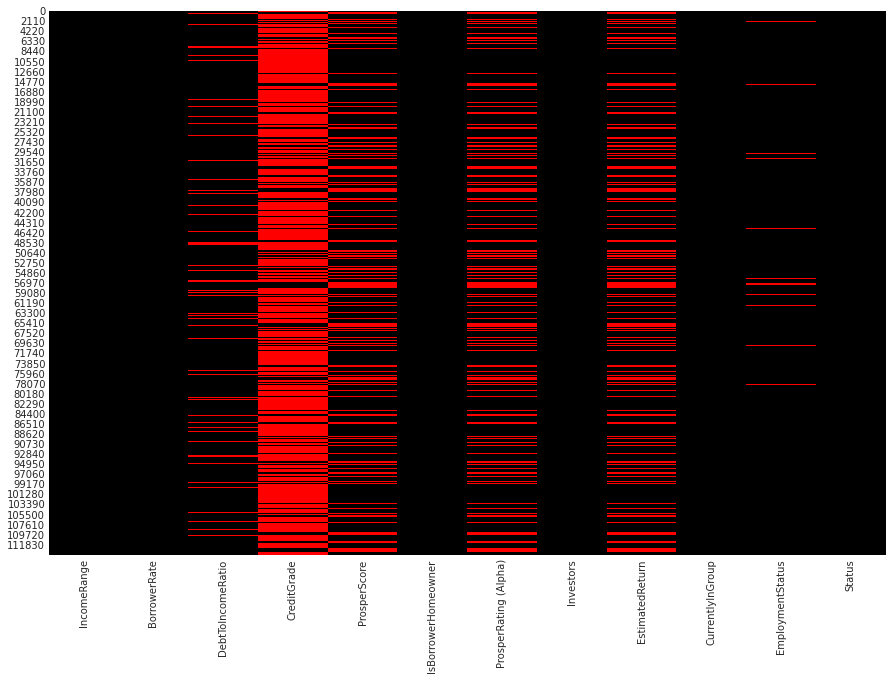

In [15]:
plt.figure(figsize=(15,10))
sns.heatmap(int_feat.isnull(), cbar = False, cmap='flag_r')


# Let's see if Borrower are Homeowner!

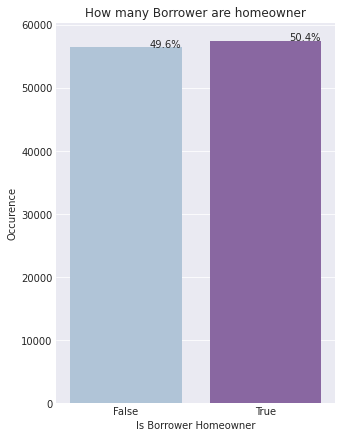

In [16]:
plt.figure(figsize=(5,7))
#ploting 
ax=sns.countplot(x='IsBorrowerHomeowner', data=int_feat, palette='BuPu' )
plt.xlabel('Is Borrower Homeowner')
plt.ylabel('Occurence')
plt.title('How many Borrower are homeowner')
#annotating the percentage
total = float(len(int_feat))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

* **Intresting to see that half borrowers are homeowners while the other half are not**
* so it looks that the feature of owning a home alone, does not affect the performance of the loan performance

# Let's see how income range affects loans

In [17]:
print (int_feat.IncomeRange.value_counts())

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64


**To simplify the data visualisation we need to replace 'Not displayed ' and 'Not employed' with '$0'**

In [18]:
int_feat['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


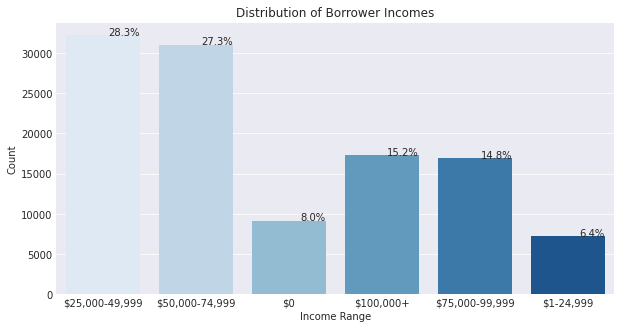

In [19]:
plt.figure(figsize = [10, 5])
# bar chart
ax=sns.countplot(x = 'IncomeRange',  data = int_feat, palette='Blues')
plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Distribution of Borrower Incomes')

#annotating the percentage
total = float(len(int_feat))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

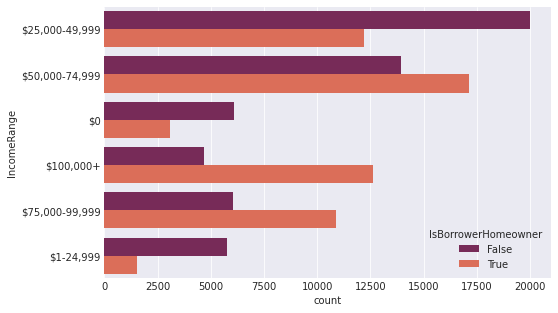

In [20]:
plt.figure(figsize = [8,5])
ax = sns.countplot(data = int_feat, y = 'IncomeRange', hue = 'IsBorrowerHomeowner',
                   palette = 'rocket')


* **we notice that most borrowers have an income of 25k-50K and 50K-75K**
* **It's also clear that the number of borrowers for the 25K-50K categorie is the same as 50K-75K categorie (same goes for 75K-100K and 100K-125K categories)**
* so it looks like the income feature does affect the loan performance

# Let's take a look how the borrower's Debt to Income Ratio looks like 
* This is very for a creditor who wants to make sure you're not overleveraged in the case you have a loss of income and are unable to repay all of your debts.

<Figure size 576x360 with 0 Axes>

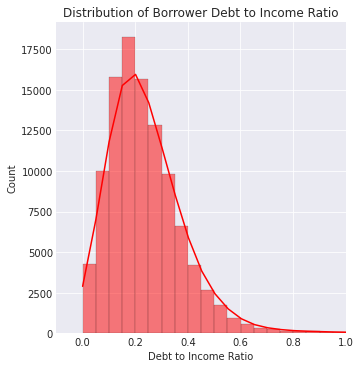

In [21]:
plt.figure(figsize = [8,5])
sns.displot(int_feat['DebtToIncomeRatio'],bins=200, kde=True , color='red')
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

* **It looks like most borrowers have a dept to income ratio of 20%**

# Let's see how being in a group affects the loan performance

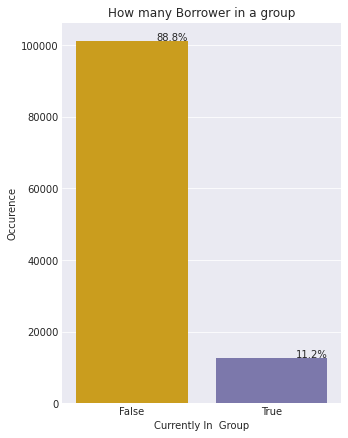

In [22]:

plt.figure(figsize=(5,7))
#ploting 
ax=sns.countplot(x='CurrentlyInGroup', data=int_feat, palette='Dark2_r' )
plt.xlabel('Currently In  Group')
plt.ylabel('Occurence')
plt.title('How many Borrower in a group')
#annotating the percentage
total = float(len(int_feat))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

# How having investors affects the loan performance

(-0.1, 1.0)

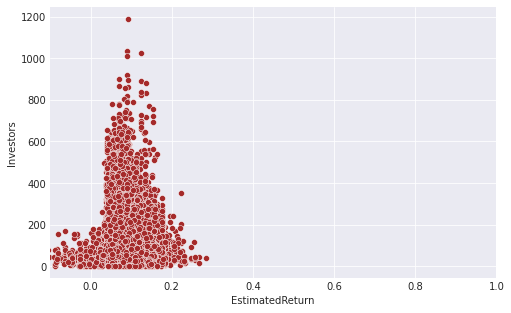

In [23]:
plt.figure(figsize = [8,5])
sns.scatterplot(data=int_feat, x='EstimatedReturn',y='Investors',color='brown')
plt.xlim(-.1, 1)

<AxesSubplot:xlabel='CreditGrade', ylabel='Investors'>

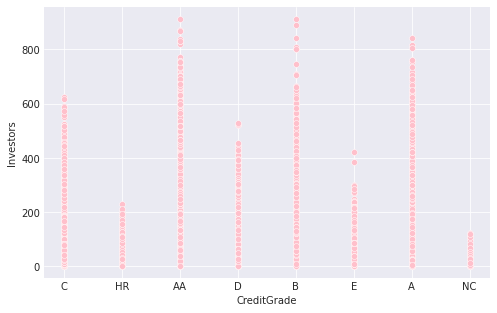

In [24]:
plt.figure(figsize = [8,5])
sns.scatterplot(data=int_feat, x='CreditGrade',y='Investors',color='pink')

<AxesSubplot:xlabel='DebtToIncomeRatio', ylabel='Investors'>

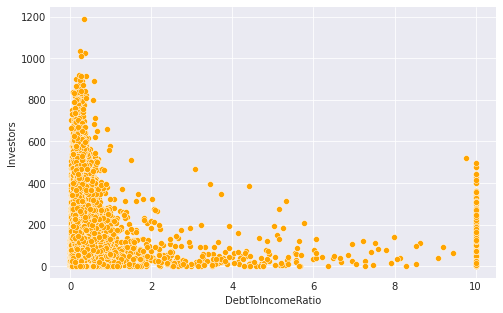

In [25]:
plt.figure(figsize = [8,5])
sns.scatterplot(data=int_feat, x='DebtToIncomeRatio',y='Investors',color='orange')


<AxesSubplot:xlabel='IsBorrowerHomeowner', ylabel='Investors'>

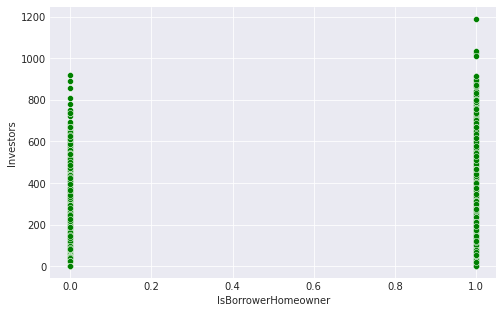

In [26]:
plt.figure(figsize = [8,5])
sns.scatterplot(data=int_feat, x='IsBorrowerHomeowner',y='Investors',color='Green')

**From the last 3 plots we can conclud that Investors tend to invest for the loans of the people with:**
* credit grade of AA or A or B, The grades of C, D and E have far less investors to them.
* debt to income ratio of 0-25%,  however a decent number of investors are investing in loans with the deb to income ratio of 10.
* Estimated return of 0-20%
* owning home
* **This implies that having a better credit score, being a homeowner, having an estimadet return of 0-20% or having a dept to income ratio of 0-25% will always have more chances of getting you more investors , resulting in a better loan performance.**

#  Employment Status and Borrower Rate vs Status

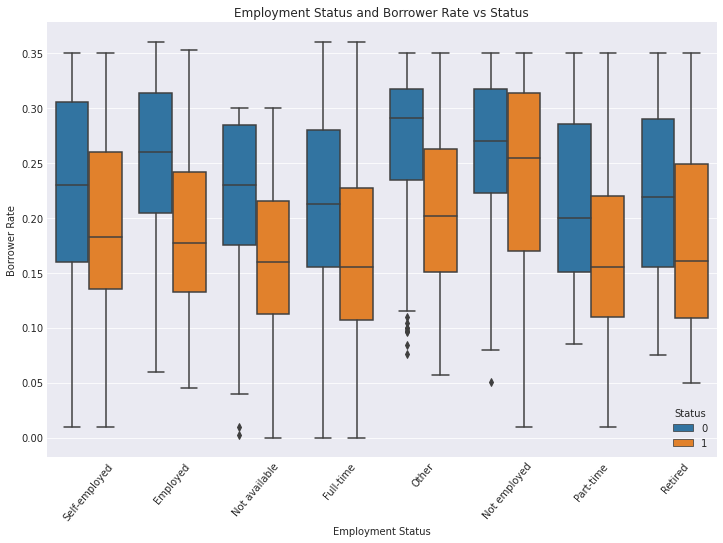

In [27]:
plt.figure(figsize = [12,8])
sns.boxplot(data = int_feat, y = 'BorrowerRate', 
            x = 'EmploymentStatus', hue = "Status");

plt.xlabel('Employment Status')
plt.ylabel('Borrower Rate')
plt.title('Employment Status and Borrower Rate vs Status');
plt.xticks(rotation = 50);

# Correlation Among Numeric Variables

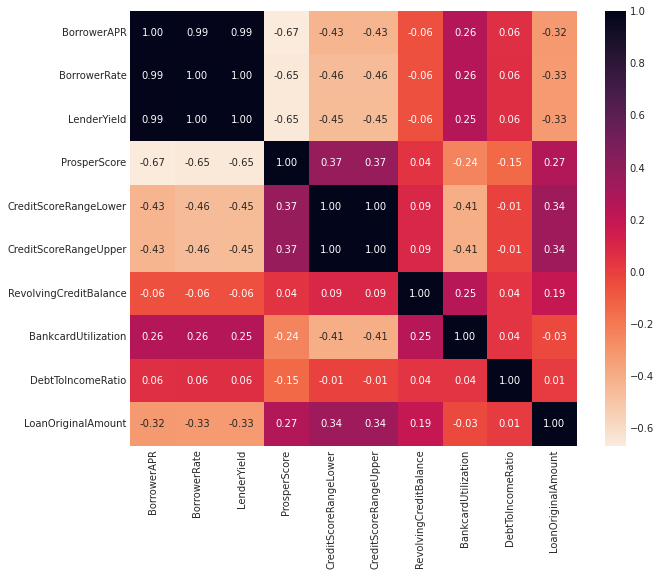

In [28]:
heat = ['BorrowerAPR','BorrowerRate','LenderYield', 'ProsperScore', 'CreditScoreRangeLower',
       'CreditScoreRangeUpper', 'RevolvingCreditBalance','BankcardUtilization', 'DebtToIncomeRatio', 
       'LoanOriginalAmount']
plt.figure(figsize = [10,8])
sns.heatmap(subset_loan[heat].corr(), cmap = 'rocket_r', annot = True, fmt = '.2f');

# Answering some of the Research questions

**What are the most number of borrowers Credit Grade?**

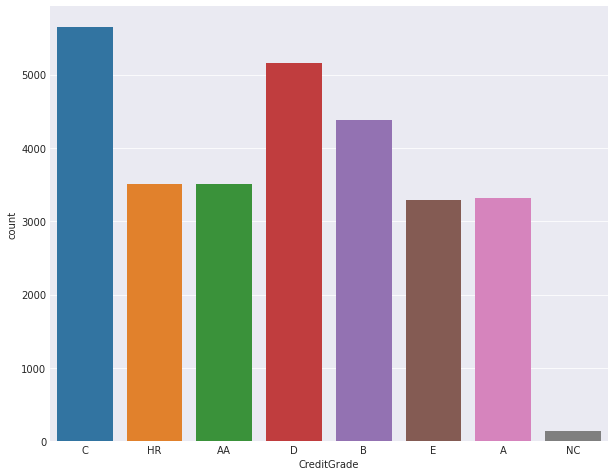

In [29]:
plt.figure(figsize = [10,8])
sns.countplot(x=subset_loan['CreditGrade']);


**Since there are so much low Credit Grade such as C and D , does it lead to a higher amount of deliquency ?**

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


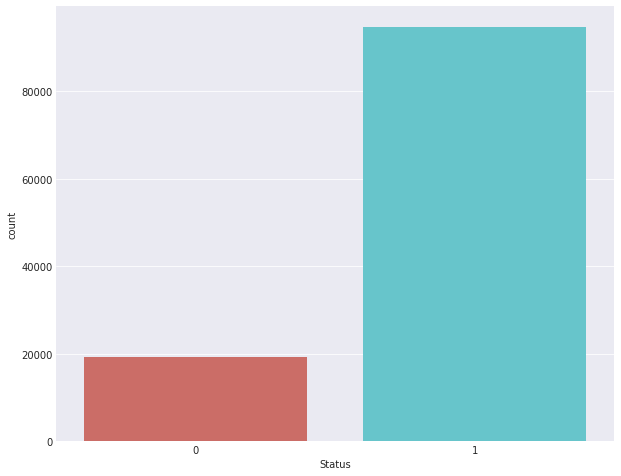

In [30]:
plt.figure(figsize = [10,8])
sns.countplot(subset_loan["Status"], palette="hls");

**What is the highest number of BorrowerRate?**

<AxesSubplot:xlabel='BorrowerRate', ylabel='Density'>

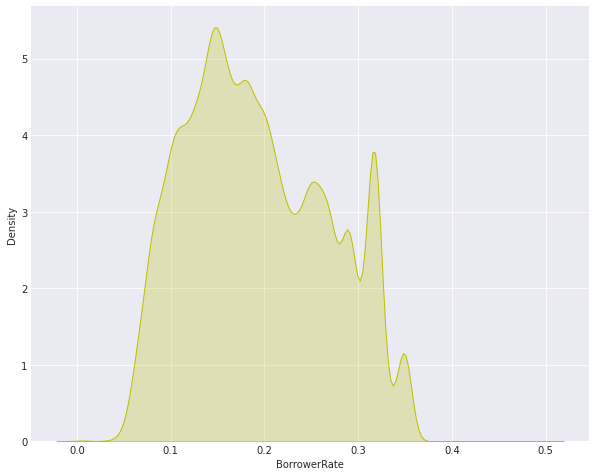

In [31]:
plt.figure(figsize = [10,8])
sns.kdeplot(subset_loan['BorrowerRate'], shade=True, color="y")

**Since the highest number of Borrower Rate is between 0.1 and 0.2, does the highest number of Lender Yield is between 0.1 and 0.2?**

<AxesSubplot:xlabel='LenderYield', ylabel='Density'>

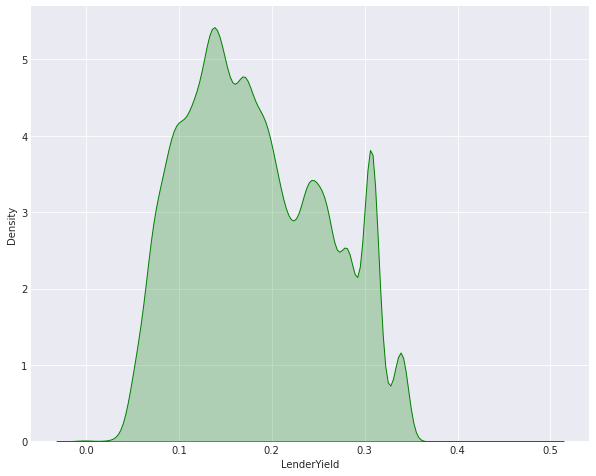

In [32]:
plt.figure(figsize = [10,8])
sns.kdeplot(subset_loan['LenderYield'], shade=True, color="g")


# Spliting DATA

In [33]:
x = subset_loan.drop(columns=['ListingKey','CreditGrade','ListingCreationDate','LoanStatus','ClosedDate'
,'ProsperRating (Alpha)','BorrowerState','Occupation','EmploymentStatus','GroupKey'
,'DateCreditPulled','FirstRecordedCreditLine','IncomeRange','LoanKey','LoanOriginationDate'
,'LoanOriginationQuarter','MemberKey','ListingCreationDate_parsed','ClosedDate_parsed','DateCreditPulled_parsed','LoanOriginationDate_parsed'  ])
y= subset_loan['Status']

# Feature Engineering 

In [34]:
from sklearn.feature_selection import VarianceThreshold
Model = VarianceThreshold(threshold=(.8 * (1 - .8)))
importance = Model.fit_transform(x)
importance = pd.DataFrame(importance)
names =  Model.get_feature_names_out()
importance.columns = names 
importance.head()

,ListingNumber,Term,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,...,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,InvestmentFromFriendsAmount,Investors
0,193129,36,NaN,NaN,0,2.0,True,640.0,659.0,5.0,...,11396.14,9425.0,1971.14,-133.18,0.0,0.0,0.0,0.0,0.0,258
1,1209647,36,6.0,7.0,2,44.0,False,680.0,699.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,81716,36,NaN,NaN,0,NaN,False,480.0,499.0,NaN,...,4186.63,3001.0,1185.63,-24.2,0.0,0.0,0.0,0.0,0.0,41
3,658116,36,6.0,9.0,16,113.0,True,800.0,819.0,5.0,...,5143.2,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,0.0,158
4,909464,36,3.0,4.0,2,44.0,True,680.0,699.0,19.0,...,2819.85,1563.22,1256.63,-60.27,0.0,0.0,0.0,0.0,0.0,20
